In [13]:
import numpy as np
import pandas as pd
import csv
titletwo=np.zeros(225)
df = pd.read_csv("dataset_f.csv", index_col=False, header=None)
print(df.shape)

(1920, 227)


In [14]:
numpy_matrix = df.values
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(1920,)
0.12447916666666667 0.329340918408561
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.24947916666666667 0.432111847640779
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.3744791666666667 0.4834520216162728
RandomForestClassifier(bootstrap=True, class_w

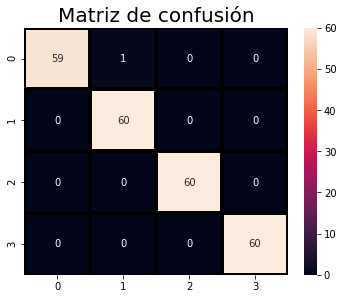

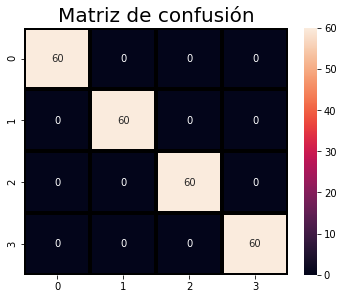

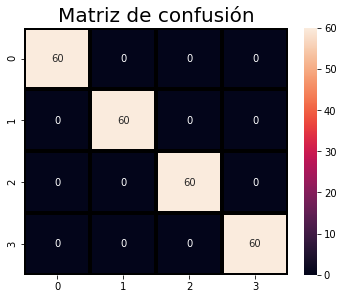

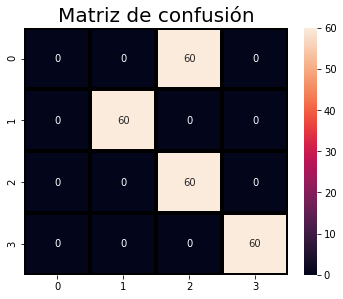

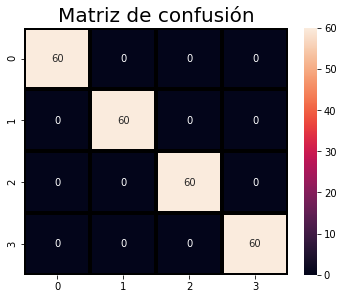

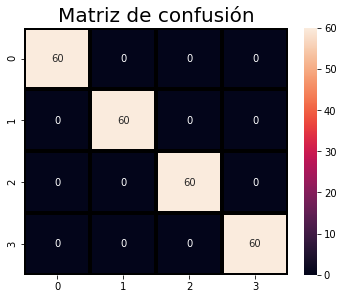

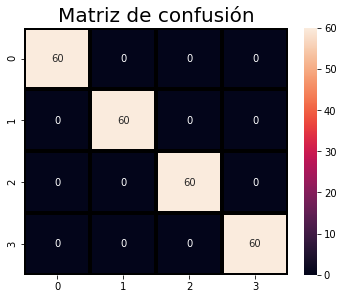

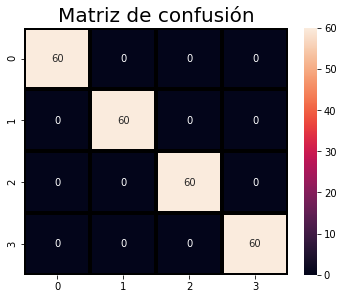

In [18]:
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import random
import math
import numpy.matlib
from scipy import stats
import scipy as sc
import operator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt



numpy_matrix = df.as_matrix()
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]
X.shape

i=0
groups = np.array(personsLabel)
print(groups.shape)

group_kfold = GroupKFold(n_splits=8)
group_kfold.get_n_splits(X, Y, groups)
eficienciaTrain=np.zeros(8)
eficienciaTest=np.zeros(8)
j=0
for train_index, test_index in group_kfold.split(X, Y, groups):
  
    Xtrain = X[train_index,:]
    Ytrain = Y[train_index]
    Xtest = X[test_index,:]
    Ytest = Y[test_index]

    #media = np.mean(X_train)
    #desvia = np.std(X_train)
    #Xtrain = sc.stats.stats.zscore(X_train)
    #Xtest = (X_test - np.matlib.repmat(media, X_test.shape[0], 1))/np.matlib.repmat(desvia, X_test.shape[0], 1)
    scaler = preprocessing.StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
   
    groups = np.array(personsLabel)
    group_kfold = GroupKFold(n_splits=7)

    params = { 
    'n_estimators': [10,20,30,40,50],
     "max_features": [1,2,3,4,5],
     'max_depth': [1,2,3,4,5,8,10,15,20],
    'criterion' :['gini', 'entropy']
    }


    rfc=RandomForestClassifier()   
    
    clf = GridSearchCV(rfc, params, cv=group_kfold.split(Xtrain, Ytrain, groups[train_index]))
    clf.fit(Xtrain,Ytrain)
    y_predTrain=clf.predict(Xtrain)
    y_predTest=clf.predict(Xtest)
    
    eficienciaTrain[j]=np.mean(y_predTrain.ravel() == y_train.ravel())
    eficienciaTest[j]=np.mean(y_predTest.ravel() == y_test.ravel())
    
    print (str(np.mean(eficienciaTest)),str(np.std(eficienciaTest)))  
    print(clf.best_estimator_)
    
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, y_predTest),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("Matriz de confusión",fontsize=20)
    
    
    j=j+1
    
    
print('Salida') 
print(clf.best_estimator_)
print('Eficiencia durante la validación = ' + str(np.mean(eficienciaTest)) + '+-' + str(np.std(eficienciaTest)))   

    


In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
y_predicted=clf.predict(X_test)
print(y_predicted)

print(X_test.shape,y_test.shape)
print(y_predicted.shape)
print('Accuracy: ', accuracy_score(y_test, y_predicted), '\n')
report = classification_report(y_test, y_predicted)
print("\nclassification report :\n",report )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
(240, 225) (240,)
(240,)
Accuracy:  1.0 


classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        60
         2.0       1.00      1.00     

Text(0.5, 1.0, 'Matriz de confusión')

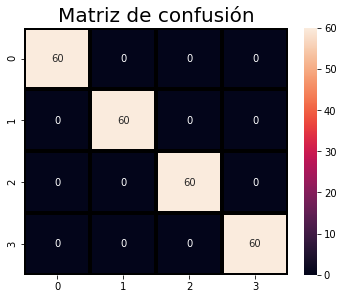

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_predicted),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)

In [7]:
 print('Accuracy: ', accuracy_score(y_test, y_predTest), '\n')
report = classification_report(y_test, y_predTest)
print("\nclassification report :\n",report )
print(clf.best_estimator_)

Accuracy:  1.0 


classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        60
         2.0       1.00      1.00      1.00        60
         3.0       1.00      1.00      1.00        60

   micro avg       1.00      1.00      1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [11]:
df=clf.cv_results_
df2=pd.DataFrame(df)
df2

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.014001,0.002977,0.001857,3.504522e-04,gini,1,1,10,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.987500,...,450,0.961806,0.842361,0.704167,0.956944,0.876389,0.803472,0.824306,0.852778,0.083436
1,0.020293,0.004394,0.002143,3.481653e-04,gini,1,1,20,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.612500,...,445,0.881250,0.914583,0.938889,0.963889,0.810417,0.861111,0.901389,0.895933,0.047181
2,0.025571,0.002770,0.002285,4.532913e-04,gini,1,1,30,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.858333,...,438,0.920139,0.931944,0.878472,0.915972,0.873611,0.925694,0.881250,0.903869,0.023139
3,0.030721,0.001150,0.002707,4.473041e-04,gini,1,1,40,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.750000,...,442,0.969444,0.951389,0.938889,0.950000,0.917361,0.885417,0.933333,0.935119,0.025263
4,0.036561,0.001602,0.003430,4.958096e-04,gini,1,1,50,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.754167,...,409,0.877083,0.943056,0.878472,0.950694,0.914583,0.942361,0.932639,0.919841,0.028608
5,0.010863,0.002083,0.001287,4.525302e-04,gini,1,2,10,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.725000,...,439,1.000000,0.977083,0.927083,0.990278,0.895139,0.883333,0.890972,0.937698,0.046691
6,0.018716,0.001158,0.001702,4.586322e-04,gini,1,2,20,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.745833,...,426,0.915278,0.904861,0.931944,0.997917,0.951389,0.940972,0.979861,0.946032,0.031007
7,0.029858,0.002949,0.002857,6.385665e-04,gini,1,2,30,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.583333,...,433,0.941667,0.926389,0.947917,1.000000,0.943056,0.954861,0.958333,0.953175,0.021388
8,0.040429,0.006276,0.003143,3.502110e-04,gini,1,2,40,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.879167,...,395,0.959028,0.984028,0.951389,0.999306,0.947222,0.950694,0.943056,0.962103,0.019652
9,0.042720,0.002507,0.003708,6.764933e-04,gini,1,2,50,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.954167,...,332,0.975694,0.955556,0.917361,1.000000,0.948611,0.934722,0.944444,0.953770,0.025137
